  ### **Изучение набора данных Олимпийских игр 2016 года в Рио-де-Жанейро**
Можем ли мы угадать вид спорта, в который играют, основываясь на физических свойствах спортсмена? Основываясь на очень простых приемах и используя только **рост, вес и возраст**, мы попытаемся выяснить, можем ли мы угадать, являются ли спортсмены футбольными, баскетбольными или волейболистами.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('fivethirtyeight')
import scipy.stats as stats
%pylab inline


Populating the interactive namespace from numpy and matplotlib


Первые пять строк данных Олимпиады показаны ниже. У нас есть 11,5 тысяч строк и 11 столбцов. Переменные включают имя, национальность, пол,дата рождения, рост, вес спортсмена, спорт. Кроме того, данные фиксируют медаль, выигранную (если таковая имеется) спортсменом.

In [2]:
# Read in the data set
athletes = pd.read_csv("https://raw.githubusercontent.com/trisha00001/Data_Preprocessing/main/athletes.csv")
athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [3]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


dob          11537 non-null  object
height       11208 non-null  float64
weight       10879 non-null  float64

In [4]:
athletes = athletes.dropna(subset=['height'])
athletes = athletes.dropna(subset=['weight'])

In [5]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10858 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10858 non-null  int64  
 1   name         10858 non-null  object 
 2   nationality  10858 non-null  object 
 3   sex          10858 non-null  object 
 4   dob          10858 non-null  object 
 5   height       10858 non-null  float64
 6   weight       10858 non-null  float64
 7   sport        10858 non-null  object 
 8   gold         10858 non-null  int64  
 9   silver       10858 non-null  int64  
 10  bronze       10858 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1017.9+ KB


## 2. Интерполяция непосредственных данных до и после нее

In [6]:
#athletes = athletes['dob'].interpolate(method = 'linear', limit_direction = 'backward')

print(athletes.isnull().sum())

id             0
name           0
nationality    0
sex            0
dob            0
height         0
weight         0
sport          0
gold           0
silver         0
bronze         0
dtype: int64


## 3. Замена данных в числовых столбцах на среднее

После повторной компиляции мы обнаруживаем, что рост, вес и возраст имеют много недостающих значений. *Заполним недостающие значения Height и Weight по значению одного и того же столбца*

In [7]:
#athletes['height'].fillna(athletes.height.mean(), inplace = True)
#athletes['weight'].fillna(athletes.weight.mean(), inplace = True)

In [8]:
print(athletes.isnull().sum())

id             0
name           0
nationality    0
sex            0
dob            0
height         0
weight         0
sport          0
gold           0
silver         0
bronze         0
dtype: int64


### Удалим дублируюшиеся значения

In [9]:
athletes.drop_duplicates()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11533,265605954,Zurian Hechavarria,CUB,female,8/10/95,1.64,58.0,athletics,0,0,0
11534,214461847,Zuzana Hejnova,CZE,female,12/19/86,1.73,63.0,athletics,0,0,0
11535,88361042,di Xiao,CHN,male,5/14/91,1.85,100.0,wrestling,0,0,0
11536,900065925,le Quoc Toan Tran,VIE,male,4/5/89,1.60,56.0,weightlifting,0,0,0


 # C. Exploratory Data Analysis

In [10]:
athletes.describe()

,id,height,weight,gold,silver,bronze
count,1.085800e+04,10858.000000,10858.000000,10858.000000,10858.000000,10858.000000
mean,5.011329e+08,1.766942,72.070915,0.059772,0.058482,0.058574
std,2.909399e+08,0.113111,16.162358,0.260756,0.242387,0.239113
min,1.834700e+04,1.210000,31.000000,0.000000,0.000000,0.000000
25%,2.460081e+08,1.690000,60.000000,0.000000,0.000000,0.000000
50%,5.020973e+08,1.760000,70.000000,0.000000,0.000000,0.000000
75%,7.555681e+08,1.840000,81.000000,0.000000,0.000000,0.000000
max,9.999878e+08,2.210000,170.000000,5.000000,2.000000,2.000000


In [11]:
athletes.describe(include=['O'])

,name,nationality,sex,dob,sport
count,10858,10858,10858,10858,10858
unique,10840,200,2,5453,27
top,Ryan Cochrane,USA,male,3/5/88,athletics
freq,2,552,5862,9,2187


# В среднем рост мужчин выше роста женщин (scipy.stats.ttest_ind)

Давайте разделим мужчин и женщин для простоты (чтобы избежать путаницы, вызванной различиями между мужчинами и женщинами).

In [12]:
males = athletes[athletes.sex == 'male']['height']
females = athletes[athletes.sex == 'female']['height']

In [13]:
athletes['sex'].value_counts()

,count
sex,
male,5862
female,4996


In [14]:
athletes.groupby(['sex']).height.mean()

,height
sex,
female,1.700152
male,1.823866


/tmp/ipython-input-15-2306852440.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(males, ax = ax, label = 'male')
/tmp/ipython-input-15-2306852440.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( females, ax = ax, label = 'female')


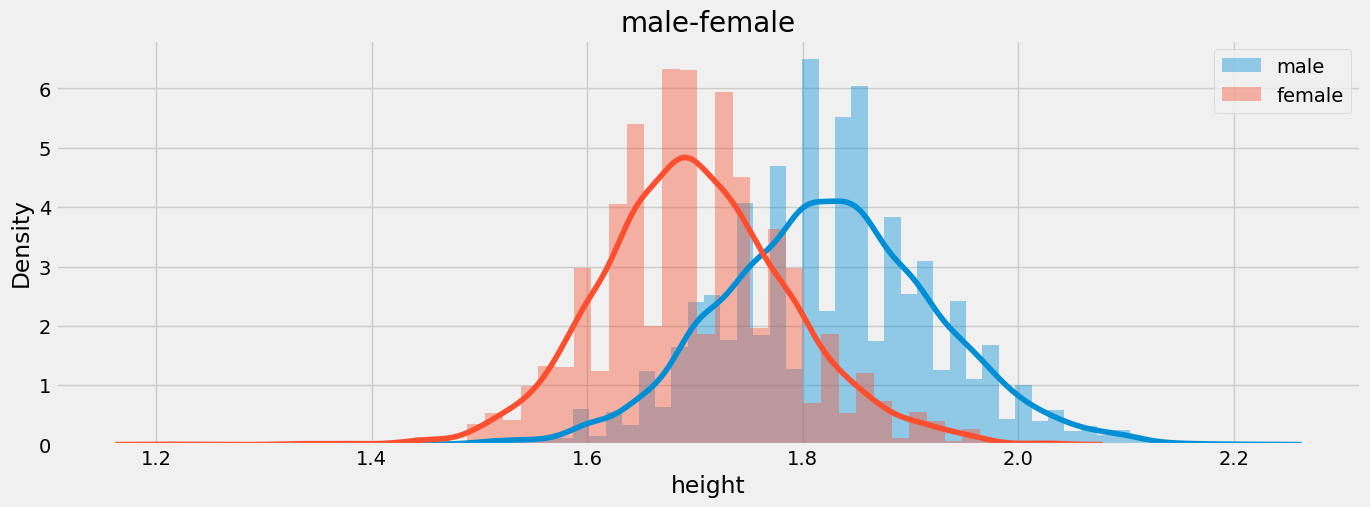

In [15]:
f, ax = plt.subplots( figsize =(15,5) )
sns.distplot(males, ax = ax, label = 'male')
sns.distplot( females, ax = ax, label = 'female')
plt.title( 'male-female' )
plt.legend()
plt.show()


/tmp/ipython-input-16-1619765920.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


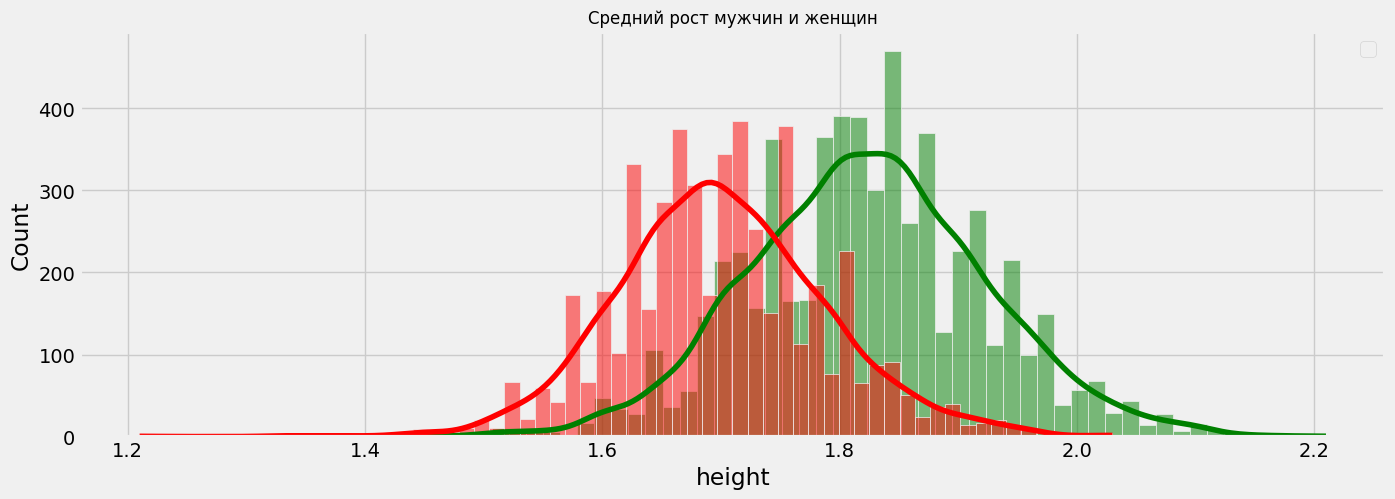

In [16]:
f, ax = plt.subplots( figsize =(15,5) )
sns.histplot(males, color='g', kde=True)
sns.histplot(females, color='r', kde=True)
plt.title('Средний рост мужчин и женщин', fontsize=12);
plt.legend()
plt.show()


In [17]:
Ho = "В среднем рост спортсменов женщин и мужчин одинаков" # Stating the Null Hypothesis
Ha = "В среднем рост спортсменов женщин и мужчин различен" # Stating the Alternate Hypothesis


In [18]:
results =  stats.levene(males,females)

alpha = 0.05

print(results.pvalue)

if (results.pvalue < alpha):
    print('Отклонить гипотезу о равенстве дисперсий')
else:
    print('Принять гипотезу о равенстве дисперсий')

1.802222933882819e-20
Отклонить гипотезу о равенстве дисперсий


In [19]:
t, p_value = stats.ttest_ind(males, females, equal_var=False)
print( 'p_value=', p_value)
if p_value < 0.05: # Setting our significance level at 5%
    print(f'{Ha} т.к. значение p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} т.к. значение p_value ({p_value}) > 0.05')


p_value= 0.0
В среднем рост спортсменов женщин и мужчин различен т.к. значение p_value (0.0) < 0.05


In [20]:
Ho = "В среднем рост спортсменов женщин и мужчин одинаков" # Stating the Null Hypothesis
Ha = "В среднем рост спортсменов женщин меньше мужчин" # Stating the Alternate Hypothesis


In [21]:
t, p_value = stats.ttest_ind(females,males, equal_var=False, alternative = 'less' )
print( 'p_value=', p_value)
if p_value < 0.05: # Setting our significance level at 5%
    print(f'{Ha} т.к. значение p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} т.к. значение p_value ({p_value}) > 0.05')


p_value= 0.0
В среднем рост спортсменов женщин меньше мужчин т.к. значение p_value (0.0) < 0.05


In [22]:
Ho = "В среднем рост спортсменов женщин и мужчин одинаков" # Stating the Null Hypothesis
Ha = "В среднем рост спортсменов  мужчин больше женщин" # Stating the Alternate Hypothesis


In [23]:
t, p_value = stats.ttest_ind(males,females,  equal_var=False, alternative = 'greater' )
print( 'p_value=', p_value)
if p_value < 0.05: # Setting our significance level at 5%
    print(f'{Ha} т.к. значение p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} т.к. значение p_value ({p_value}) > 0.05')

p_value= 0.0
В среднем рост спортсменов  мужчин больше женщин т.к. значение p_value (0.0) < 0.05


# В среднем рост спортсменов мужчин футболист, баскетболист или волейболист одинаков, различен. (scipy.stats.f_oneway(*args, axis=0))

In [24]:
males = athletes[athletes.sex == 'male']


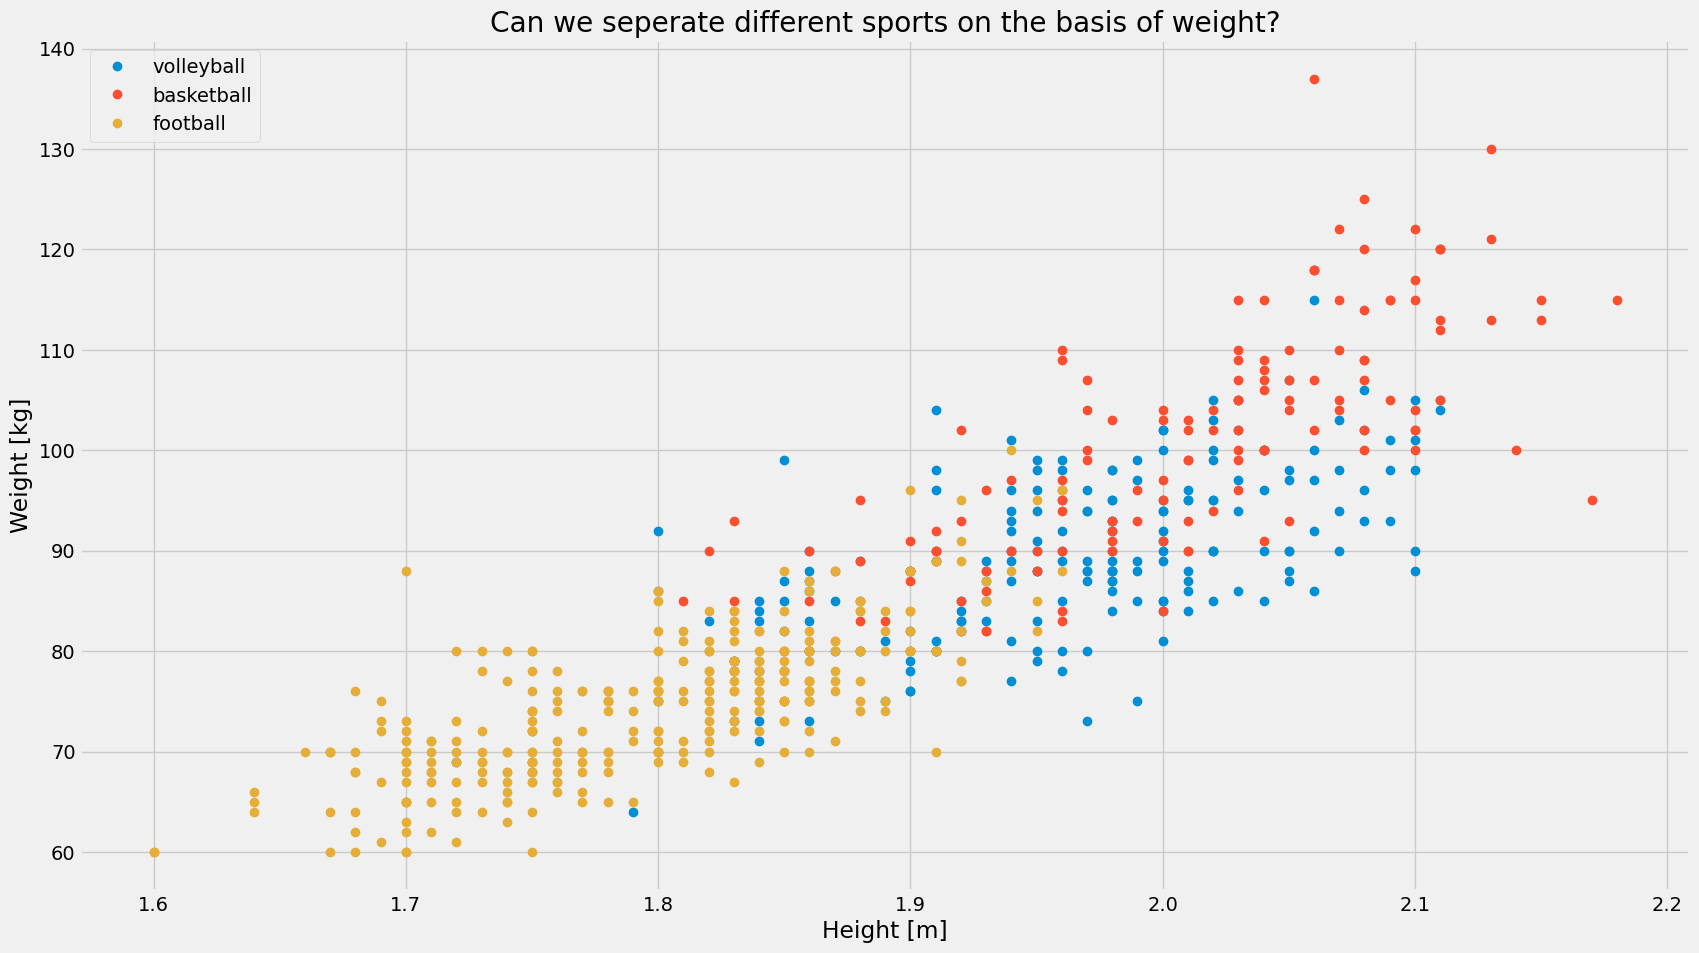

In [25]:
legend = []
sports = ['volleyball','basketball','football']
for sport in sports:
    plt.plot(males.height[males.sport == sport],males.weight[males.sport == sport], 'o')
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(18.5, 10.5)
    legend.append(sport)


plt.legend(legend, loc = 2,numpoints=1)
plt.title('Can we seperate different sports on the basis of weight?')
plt.xlabel('Height [m]')
plt.ylabel('Weight [kg]')
plt.show()

In [26]:

sport_v = athletes[athletes.loc[:,"sport"].isin(["volleyball"])]['height']
sport_b = athletes[athletes.loc[:,"sport"].isin(["basketball"])]['height']
sport_f = athletes[athletes.loc[:,"sport"].isin(["football"])]['height']


In [27]:
Ho = 'В среднем рост спортсменов мужчин футболист, баскетболист или волейболист одинаков'
H1 = 'В среднем рост спортсменов мужчин футболист, баскетболист или волейболист различен'
f_stat, p_value = stats.f_oneway(sport_v, sport_b, sport_f)
print('f_stat=', f_stat, 'p_value=', p_value)
if p_value < 0.05:
    print(f'{H1} т.к. значение p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} т.к. значение p_value ({p_value}) > 0.05')

f_stat= 389.6777295139303 p_value= 3.6095958240768345e-132
В среднем рост спортсменов мужчин футболист, баскетболист или волейболист различен т.к. значение p_value (3.6095958240768345e-132) < 0.05


https://kpfu.ru/portal/docs/F1452183260/Lekciya.3.pdf